# $M/HYPO_r/1$ queue: Matrics-Analytic Method

## Examples of Matrix Blocks
For an $M/Hypo_r/1$ queue system with mean arrival rate $\lambda$ and $r$ stages of services each with service rate $\mu_i$ ($1 \leq i \leq r$), its <b>transition rate matrix</b> (<b>infinitesimal generator</b> Q has the typical block-tridiagonal (or QBD—quasi-birth-death) form

<p><center>$Q = \begin{pmatrix}
B_{00} &B_{01}  & 0 & 0 & 0 & \ldots\\ 
B_{10} & A_{1} & A_{2} & 0 & 0 &\dots \\ 
 0& A_{0} &  A_{1} & A_{2}  & 0 &\ldots \\ 
 0&  0& A_{0} &  A_{1}  & A_{2} & \\ 
 0&  0&  0& A_{0} &  A_{1}  & \ldots\\ 
 \vdots& \vdots & \vdots & \vdots & \vdots & \ddots
\end{pmatrix}$</center></p>

- $A_0$: Transitions from state (k, r) to state (k − 1, 1), the transit rate of the last service phase.
- $A_1$: The superdiagonal elements of the matrices $A_1$ represent phase completion to state (k + 1, i ). It follows that the only nonzero elements in this matrix are the diagonal elements The diagonal elements are set equal to the negated sum of the off-diagonal elements of Q. All other at rate rμ in service phase i < r at level k > 0, i.e., transitions from state (k, i ) to state (k, i + 1).
- $A_2$: The matrices A2 represent arrivals at rate λ which can occur during service at any phase i at any level k > 0, i.e., transitions from state (k, i ) which are all equal to λ.
- $B_{01}$: A 1 × r row matrix all of whose elements are zero except for the first which is equal to $\lambda$. This is the rate of transition from state (0, 0) to state (1, 1) and corresponds to an arrival to an empty system.
- $B_{10}$: A r × 1 column matrix all of whose elements are zero except for the last which is equal to $\mu_r$. This is the rate of transition from state (1, r) to state (0, 0) and corresponds to the complete service termination of the only customer in the system.
- $B_{00}$: A 1×1 matrix whose nonzero element is $-\lambda$ and reflects the fact that the sum across the first row must be zero.

$A_0=\begin{pmatrix}
0 & 0  & 0 & 0 & \ldots & 0\\ 
0 & 0 & 0 & \ldots & \ldots &0 \\ 
 0& 0 &  0 & 0  & \ldots &0 \\ 
 0&  0& 0 &  0  & \ldots & 0\\ 
 \vdots& \vdots & \vdots & \vdots &\ddots & \vdots\\ 
 \mu_r & 0 & 0 & 0 & \ldots & 0
\end{pmatrix},\hspace{1cm}
A_2=\lambda I_r,\hspace{1cm}
A_1 = \begin{pmatrix}
-\lambda-\mu_1 & \mu_1  & 0 & 0 & \ldots & 0\\ 
0 & -\lambda-\mu_2 & \mu_2 & 0 & \ldots &0 \\ 
0 & 0 &  -\lambda-\mu_3 & \mu_3  & \ldots &0 \\ 
\vdots& \vdots & \vdots & \ddots &\ddots & \vdots\\ 
0&  0& 0 &  0  & \vdots & \mu_{r-1}\\
 0 & 0 & 0 & 0 & \ldots & -\lambda-\mu_r
\end{pmatrix}$

$B_{00}=-\lambda, \hspace{1cm}
B_{01}=\begin{pmatrix}
\lambda & 0 & 0 & \ldots & 0
\end{pmatrix},\hspace{1cm}
B_{10}=\begin{pmatrix}
0\\ 
0\\  
\vdots\\ 
0 \\
\mu_r
\end{pmatrix}$


## 1. Construct the block submatrices
Block submatrices $A_i/B_i$ can be expressed by partitioned matrices.<br>
For a Ph/Ph/1 queue with $r_a$ phases in the description of the arrival process and $r_s$ phases in the description of the service process, the block submatrices required for the application of the matrix geometric approach are given by:

<h3><center>$A_0=I_{r_a}\otimes (S^{0}\cdot \sigma ),\hspace{1cm}    
A_1=T\otimes I_{r_s}+I_{r_a}\otimes S,\hspace{1cm}
A_2=(T^{0}\otimes \xi)\otimes I_{r_s},$</center></h3>

<h3><center>$
B_{00}=T,\hspace{1cm}   
B_{01}=(T^{0}\cdot \xi)\otimes \sigma,\hspace{1cm}   
B_{10}=I_{r_a}\otimes S^{0}$</center></h3>

where $\otimes$ means Kronecker product of two matrics, e.g., 

$A = \begin{pmatrix}
a & b\\ 
c & d
\end{pmatrix}, \hspace{1cm}
B = \begin{pmatrix}
\alpha & \beta\\ 
\gamma  & \delta 
\end{pmatrix},\hspace{1cm}
A\otimes B=\begin{pmatrix}
aB & bB\\ 
cB & dB
\end{pmatrix}
=
\left(\begin{array}{@{}cc|cc@{}}
    a\alpha & a\beta & b\alpha & b\beta  \\
    a\gamma & a\delta & b\gamma & b\delta \\\hline  
    c\alpha & c\beta & d\alpha & d\beta  \\
    c\gamma & c\delta & d\gamma & d\delta   
  \end{array}\right)$

${S}'=\left(\begin{array}{@{}ccccc|c@{}}
    -\mu_{1} & \mu_{1} & 0 & 0 & 0 & 0 \\
    0 & -\mu_{2} & \mu_{2} & 0 & 0 & 0 \\
    0 & 0 & -\mu_{3} & \mu_{3} & 0 & 0 \\
    \vdots & \vdots & \vdots & \ddots & \vdots& \vdots \\
    0 & 0 & 0 & 0 & -\mu_{r_a}  & \mu_{r_a} \\\hline    
    0 & 0 & 0 & 0 & 0 & 0 
  \end{array}\right)
=\begin{pmatrix}
S & S^{0}\\ 
0 & 0
\end{pmatrix}\hspace{1cm}$
${\sigma }'=\left ( \begin{array}{@{}ccccc|c@{}} 
1&0&0&\ldots &0&0
\end{array}\right )=\begin{pmatrix}
\sigma  & 0
\end{pmatrix}\hspace{1cm}$


${T}'=\left(\begin{array}{@{}cccc|c@{}}
    -\lambda_{1} & 0 &  0 & 0 & \lambda_{1} \\
    0 & -\lambda_{2} &  0 & 0 & \lambda_{2}  \\
    \vdots & \vdots & \vdots & \vdots& \vdots \\
    0 & 0 & 0 & -\lambda_{r_s}  & \lambda_{r_s}  \\\hline    
    0 & 0 & 0 & 0 & 0 
  \end{array}\right)
=\begin{pmatrix}
T & T^{0}\\ 
0 & 0
\end{pmatrix}\hspace{1cm}$
${\xi }'=\left ( \begin{array}{@{}ccccc|c@{}} 
\alpha_1&\alpha_2&\alpha_3&\ldots &\alpha_{r_s}&0
\end{array}\right )=\begin{pmatrix}
\xi  & 0
\end{pmatrix}$

## 2. Form Neats' R matrix
To form Neuts' R matrix, first let
<h3><center>$V=A_{2}A_{1}^{-1},\hspace{1cm}W=A_{0}A_{1}^{-1}$</center></h3>

then, we have 
<h3><center>$R_{k+1}=-V-R_{k}^{2}W,\hspace{1cm}R_0 = 0$</center></h3>
where $R_k$ converges to the Neuts' matrix $R$, which can be iteratively solved by $\left \| R_{k+1} - R_{k} \right \|_{1} \leq 10^{-10}$

## 3. Solve the Boundary Equations

Solve the boundary equations
<h3><center>$\begin{pmatrix}
\pi_0 & \pi_1 
\end{pmatrix}
\begin{pmatrix}
B_{00} & B_{01} \\ 
B_{10} & A_{1}+RA_{0}
\end{pmatrix}=0$</center></h3>

to compute both $\pi_0$ and $\pi_1$.
Then, the other block components of the solution were obtained from 
<h3><center>$\pi_k = \pi_1 R^{k-1}, k=2,3,...$</center></h3>

Here, $\pi_k=(\pi_{k1},\pi_{k2},...), \pi=(\pi_{0},\pi_{1},\pi_{2},...,\pi_{i},...)$ is the stationary probability distribution. It satisfies the global balance equations (GBEs): 

<h3><center>$\pi \cdot \mathbf{Q}=\vec{0}$</center></h3>

where 
- Q is the infinisimal generator matrix, $\vec{\pi}\cdot \vec{1}=1$. 
- $\pi_{0}$ is the probability that there is no transaction in the queue system. 
- $\pi_{i},i=1,2,3...$ is a row vector of length r, its jth component defines the probability of being in the jth sequential service when there are i transactions in the queue system.

## 4. Measure Performance Metrics for $Ph/Ph/1$ Queues
The average number of customers in a Ph/Ph/1 queueing system is obtained as
<h3><center>$E[N]=\left \| \pi_{1}(I-R)^{-2} \right \|_{1}$</center></h3>
<h3><center>$E[N_q]=E[N]-\frac{\lambda}{\mu},\hspace{1cm}E[R]=\frac{E[N]}{\lambda},\hspace{1cm}E[T_q]=\frac{E[N_q]}{\lambda}$</center></h3>
where $\left \| \pi_{1}(I-R)^{-2} \right \|_{1}$ means matrix or vector norm (Order=1). 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import kron,eye,zeros,ones,multiply,dot
from numpy.linalg import inv,norm,matrix_power

from utils import ProcHarData, ProcLocustData

In [2]:
class PhQueue:
    
    def __init__(self,lambda1,mu1,mu2):
        self.lambda1 = lambda1
        self.T = np.array([-lambda1])
        self.T0 = np.array([lambda1])
        self.xi = np.array([1])
        
        self.mu1 = mu1
        self.mu2 = mu2
        self.S = np.array([[-mu1, mu1],[0, -mu2]])
        self.S0 = np.array([[0],[mu2]])
        self.sigma = np.array([1,0])
        
        self.ra = len(self.T)
        self.rs = len(self.S[0])
        self.A0 = kron(eye(self.ra), multiply(self.S0,self.sigma))
        self.A1 = kron(self.T, eye(self.rs)) + kron(eye(self.ra), self.S)
        self.A2 = kron(multiply(self.T0,self.xi), eye(self.rs))
        self.B00 = self.T
        self.B01 = kron(multiply(self.T0,self.xi),self.sigma)
        self.B10 = kron(eye(self.ra),self.S0)
        self.l = len(self.B00)
        self.r = len(self.A0[0])
    
        
    def formBeutsRMatrix(self,err=1.0e-10):
        V = dot(self.A2, inv(self.A1))
        W = dot(self.A0, inv(self.A1))
        R = zeros((self.r,self.r)) 
        Rbis = -V - dot(dot(R,R), W)
        n = 1
        while (norm(R-Rbis,1) > err):
            R = Rbis
            Rbis = -V - dot(dot(R,R), W)
            n = n+1
        R = Rbis
        return R
    
    
    def checkStability(self):
        meanLambda = self.lambda1
#         meanMu = 1/norm(-self.sigma * inv(self.S),1)
        meanMu = 1/(1/self.mu1+1/self.mu2)
        rho = meanLambda/meanMu
        return round(rho,5)
        
        
    def solveBounaryEquations(self):
        R = self.formBeutsRMatrix()
        
        head = np.concatenate((np.array(self.B00),self.B01),axis=0)
        tail = np.concatenate((self.B10,self.A1+dot(R,self.A0)),axis=1)
        N = np.vstack((head,tail))
        r = self.r
        N[0,r] = 1
        for k in range(1,r+1):
            N[k,r]=0

        rhs = zeros(r+1)
        rhs[r] = 1

        soln = dot(rhs,inv(N))
        pi0 = soln[:1]
        pi1 = soln[1:]

        e = ones((r,1))
        sumation = norm(pi0,1) + dot(dot(pi1, inv(eye(r)-R)), e)
        pi0 = pi0/sumation
        pi1 = pi1/sumation
        return pi0,pi1
        
    def printRes(self,max=10):
        R = self.formBeutsRMatrix()
        pi0,pi1 = self.solveBounaryEquations()
        
        pop = zeros((max+1,1))
        pop[0,0] = norm(pi0,1)
        for k in range(1,max+1):
            pi = pi1 * matrix_power(R,(k-1)) # Get successive components of pi
            pop[k,0] = norm(pi,1)
        print(pop)
        
        
    def measurePerf(self):
        R = self.formBeutsRMatrix()
        _,pi1 = self.solveBounaryEquations()
        
        EN = norm(pi1*(matrix_power(eye(self.r)-R,-2)),1)
        ER = EN/self.lambda1
        return round(EN,5),round(ER,5)

## R's Symbolic solution for $M/Hypo_2/1$ queue
$R=\begin{pmatrix}
\frac{\lambda(\lambda+\mu_2)}{\mu_1\mu_2} & \frac{\lambda}{\mu_2}\\ 
\frac{\lambda^2}{\mu_1\mu_2} & \frac{\lambda}{\mu_2}
\end{pmatrix}$

In [184]:
lambda1,mu1,mu2 = 155,400,600
R = np.array([[lambda1*(lambda1+mu2)/(mu1*mu2),lambda1/mu2],
      [np.power(lambda1,2)/(mu1*mu2),lambda1/mu2]])
testq = PhQueue(lambda1,mu1,mu2)
R2 = testq.formBeutsRMatrix()
print("Symbolic R: \n", R, '\n', "Neuts R: \n", R2)

Symbolic R: 
 [[0.48760417 0.25833333]
 [0.10010417 0.25833333]] 
 Neuts R: 
 [[0.48760417 0.25833333]
 [0.10010417 0.25833333]]


In [185]:
testq.printRes()

[[0.35416667]
 [0.17269314]
 [0.1014932 ]
 [0.05842028]
 [0.03341799]
 [0.01907962]
 [0.01088692]
 [0.00621101]
 [0.0035432 ]
 [0.00202126]
 [0.00115304]]


In [186]:
testq.solveBounaryEquations()

(array([0.35416667]), array([0.17269314, 0.09149306]))

# Check the results in the HLF case

In [153]:
lambdas,mu1,mu2 = np.arange(15,175,20),500,500
ls_EN, ls_ER, ls_rho = [],[],[]
for lam in lambdas:
    queue = PhQueue(lam,mu1,mu2)
    EN,ER = queue.measurePerf()
    rho = queue.checkStability()
    ls_EN.append(EN)
    ls_ER.append(ER)
    ls_rho.append(rho)
    print(lam,'EN:',EN, ' ER:', ER, ' rho:', rho)

15 EN: 0.03183  ER: 0.00212  rho: 0.06
35 EN: 0.08026  ER: 0.00229  rho: 0.14
55 EN: 0.1363  ER: 0.00248  rho: 0.22
75 EN: 0.20138  ER: 0.00269  rho: 0.3
95 EN: 0.27787  ER: 0.00292  rho: 0.38
115 EN: 0.36989  ER: 0.00322  rho: 0.46
135 EN: 0.48729  ER: 0.00361  rho: 0.54
155 EN: 0.67249  ER: 0.00434  rho: 0.62


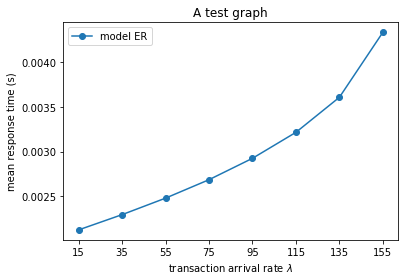

In [139]:
fig,ax = plt.subplots()

ax.plot(lambdas,ls_ER, marker='o',label='model ER')
ax.set_xticks(lambdas)
ax.set_xlabel("transaction arrival rate $\lambda$")
ax.set_ylabel("mean response time (s)")
ax.set_title("A test graph")
ax.legend()

fig.show()

# Evaluate IOTA perf

In [11]:
from utils import ProcLocustData

filename = 'data/requests_full_history_1619222050.317702.csv'
locust = ProcLocustData(filename)
df = locust.load2DF()
df = df.groupby(by='User Count').mean()

In [6]:
def plotComparison(lambdas,ls_ER,meanRTS):
    fig,ax = plt.subplots(figsize=(18,5))
    ax.plot(lambdas,ls_ER, marker='o',label='model mean response time')
    ax.plot(lambdas,meanRTS,marker='*',label='test mean response time')
    ax.set_xticks(lambdas)
    ax.set_xlabel("transaction arrival rate $\lambda$")
    ax.set_ylabel("mean response time (s)")
    ax.set_title("Mean response time comparison in varing arrival rates")
    ax.legend()
    fig.show()

In [12]:
df

,Timestamp,Requests/s,Failures/s,50%,66%,75%,80%,90%,95%,98%,...,99.90%,99.99%,100%,Total Request Count,Total Failure Count,Total Median Response Time,Total Average Response Time,Total Min Response Time,Total Max Response Time,Total Average Content Size
User Count,,,,,,,,,,,,,,,,,,,,,
20,1.619221e+09,9.094761,0.0,1205.932203,1377.966102,1692.372881,1706.779661,1898.305085,2044.915254,2223.728814,...,2385.593220,2385.593220,2385.593220,556.711864,0.0,1205.932203,1352.771584,956.347458,2383.144068,232.0
30,1.619221e+09,10.352941,0.0,1484.873950,1770.588235,1891.596639,1971.428571,2272.268908,2528.571429,2783.193277,...,3418.487395,3663.865546,3663.865546,1746.563025,0.0,1483.193277,1560.703086,947.000000,3661.789916,232.0
40,1.619221e+09,10.912605,0.0,1856.302521,2095.798319,2357.983193,2507.563025,2842.016807,3164.705882,3497.478992,...,4608.403361,5265.546218,5265.546218,3032.394958,0.0,1856.302521,1900.801835,919.050420,5291.857143,232.0
50,1.619221e+09,11.121008,0.0,2088.235294,2611.764706,2837.815126,3024.369748,3474.789916,3841.176471,4300.840336,...,5742.857143,6678.991597,6678.991597,4361.924370,0.0,2088.235294,2247.647190,887.000000,6684.168067,232.0
60,1.619221e+09,11.352101,0.0,2521.008403,3000.840336,3377.310924,3567.226891,4125.210084,4596.638655,5078.151261,...,6754.621849,7983.193277,7983.193277,5724.672269,0.0,2520.168067,2598.975928,887.000000,7942.058824,232.0
70,1.619222e+09,11.489916,0.0,2776.470588,3453.781513,3853.781513,4131.092437,4764.705882,5256.302521,5937.815126,...,8088.235294,9856.302521,9856.302521,7110.109244,0.0,2776.470588,2944.303612,887.000000,9747.630252,232.0
80,1.619222e+09,11.517391,0.0,3088.695652,3829.565217,4332.173913,4627.826087,5380.869565,6027.826087,6731.304348,...,9252.173913,11000.000000,11000.000000,8524.513043,0.0,3088.695652,3273.714648,887.000000,10731.904348,232.0
90,1.619222e+09,11.652459,0.0,3418.032787,4269.672131,4815.573770,5163.934426,6081.147541,6762.295082,7584.426230,...,10526.229508,11967.213115,12163.934426,9977.040984,0.0,3418.032787,3620.923809,887.000000,12004.311475,232.0
100,1.619222e+09,11.776106,0.0,3677.876106,4671.681416,5300.884956,5723.008850,6697.345133,7444.247788,8406.194690,...,11477.876106,13000.000000,13000.000000,11336.991150,0.0,3677.876106,3948.926952,887.000000,13444.000000,232.0


9.09 EN: 1.65986  ER: 0.1826  rho: 0.7575
10.35 EN: 3.35025  ER: 0.3237  rho: 0.8625
10.91 EN: 5.35683  ER: 0.491  rho: 0.90917
11.12 EN: 6.76718  ER: 0.60856  rho: 0.92667
11.35 EN: 9.35663  ER: 0.82437  rho: 0.94583
11.49 EN: 12.07564  ER: 1.05097  rho: 0.9575
11.52 EN: 12.86455  ER: 1.11671  rho: 0.96
11.65 EN: 17.84543  ER: 1.5318  rho: 0.97083
11.78 EN: 28.71131  ER: 2.43729  rho: 0.98167


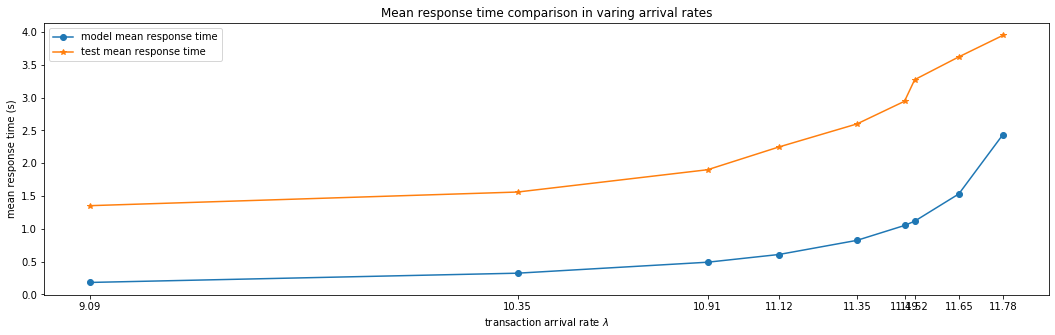

In [154]:
mu1,mu2 = 20,30

df = df.sort_values(by='Requests/s')
lambdas = np.round(df['Requests/s'].values,2)
meanRTS = (df['Total Average Response Time']/1000).values

ls_EN, ls_ER, ls_rho = [],[],[]
for lam in lambdas:
    queue = PhQueue(lam,mu1,mu2)
    EN,ER = queue.measurePerf()
    rho = queue.checkStability()
    ls_EN.append(EN)
    ls_ER.append(ER)
    ls_rho.append(rho)
    print(lam,'EN:',EN, ' ER:', ER, ' rho:', rho)
plotComparison(lambdas,ls_ER,meanRTS)

# $M/G/1$ Pollaczek-Khinchin (P-K) Method

- TQ : time in queue 
- NQ : number in queue NA
- Q : number in queue as seen by the arrival
- S : service time of a job, where E [S]=1/μ 
- Si : service time of the ith job in the queue 
- Se : excess of S – the remaining service time of the job in service, given that there is some job in service.
- R: response time, E[R]=E[TQ]+E[S]
    
For a general service distribution, we have
<h3><center>$E[T_Q]=\frac{\rho}{1-\rho}\cdot E[S_e]$</center></h3>
<h3><center>$E[S_e]=\frac{E[S]}{2}\cdot (C_{S}^{2}+1)$</center></h3>
We get the <b>Pollaczek-Khinchin (P-K)</b> formula below,
<h3><center>$ \begin{aligned}
    E[T_Q] = \frac{\rho}{1-\rho}\cdot\frac{E[S]}{2}\cdot (C_{S}^{2}+1)
  \end{aligned}
$</center></h3>
where $C_{S}^{2}$ is the <b>squared coefficient of variation</b> of S,
<h3><center>$C_{S}^{2}=\frac{Var(S)}{E[S]^{2}}$</center></h3>


- If service time $S$ follows an <b>Hypoexponential-k</b> distribution with service rate $\mu_i$ at each stage, we have
<h3><center>$E[S]=\sum\limits_{i=1}^{k}\frac{1}{\mu_i},\hspace{1cm} 
Var(S)=\sum\limits_{i=1}^{k}\frac{1}{\mu_i^{2}},\hspace{1cm}
\rho=\lambda\cdot E[S]$</center></h3>

- If service time $S$ follows an <b>Erlang-k</b> distribution with service rate $\mu$ at each stage, we have
<h3><center>$E[S]=\frac{k}{\mu},\hspace{1cm} Var(S)=\frac{k}{\mu^{2}},\hspace{1cm} \rho=\lambda\cdot E[S]=\frac{k\lambda}{\mu}$</center></h3>

<h3><center>$C_{S}^{2}=\frac{Var(S)}{E[S]^{2}}=\frac{1}{k}$</center></h3>

The $E_k$ distribution consists of k stages in series, each with Exponential service time with mean 1/μ. If there is a job in service at the time of an arrival, then it is equally likely that the job is at each of the k stages. On average, the job in service will be at the middle stage, leaving $\left \lceil \frac{k+1}{2} \right \rceil$ stages left to be completed. Intuitively, we have
<h3><center>$E[S_e]=\left \lceil \frac{k+1}{2} \right \rceil \cdot \frac{1}{\mu}$</center></h3>

On the other hand, from the <b>Renewal-Reward Theory</b>, we have
<h3><center>$\begin{aligned}
    E[S_e] & =\frac{E[S]}{2}\cdot (C_{S}^{2}+1)\\
           & = \frac{k}{2\mu}\cdot (\frac{1}{k}+1)\\
           & = \frac{1}{\mu}\cdot (\frac{k+1}{2})\\
    \end{aligned}$</center></h3>

Therefore, we have the performance metrics for an $M/Hypo_k/1$ queue
<h3><center>$E[T_Q] = \frac{\rho}{1-\rho}\cdot\frac{E[S]}{2}\cdot (C_{S}^{2}+1)$</center></h3>

<h3><center>$E[R]=E[T_Q]+E[S]$</center></h3>
  

In [4]:
import math
def mg1_metrics(lam, ES, VarS):
    """
    Given arrival rate and service statistics, this function calculates performance metrics for an M/G/1 queue based on the closed form solution.
    
    :param lam: lambda/request arrival rate of the markovian process
    :type lam: int
    :param ES: mean service time of all service phases
    :type ES: float
    :param lam: lambda/request arrival rate of the markovian process
    :type lam: float
    
    :return: system performance metrics
    :rtype: float
    """
    CS2 = VarS/(ES**2)
    ESe = ES/2*(CS2+1)
    rho = lam*ES
    ETQ = rho/(1-rho)*ESe
    ER = ETQ + ES
    ENQ = lam*ETQ
    EN = lam*ER

    return round(rho,5), round(ETQ,5), round(ER,5), round(EN,5), round(ENQ,5)

def mek1q_perf(k,lam,mu):
    """
    markovian arrival process with rate lam;
    k stages of services;
    each stage with service rate mu
    """
    ES = k/mu
    VarS = k/(mu**2)
    
    return mg1_metrics(lam, ES, VarS)

def mhypo21q_perf(k,lam,mu1,mu2):
    """
    markovian arrival process with rate lam;
    k stages of services;
    each stage with service rate mu1,mu2
    """
    ES = 1/mu1+1/mu2
    VarS = 1/(mu1**2)+1/(mu2**2)
    
    return mg1_metrics(lam, ES, VarS)

def mek1q_ceil_metrics(k,lam,mu):
    ESe = math.ceil((k+1)/2)*(1/mu)
#     ESe = (k+1)/2*(1/mu)
    ES = k/mu
    rho = lam*ES
    ETQ = rho/(1-rho)*ESe
    ER = ETQ + ES
    ENQ = lam*ETQ
    EN = lam*ER
    return round(rho,5), round(ETQ,5), round(ER,5), round(EN,5), round(ENQ,5)

In [140]:
# M/Hypo2/1 case (derived E[Se])
k, lambdas, mu1, mu2 = 2, range(15,175,20),400,600
for lam in lambdas:
    rho, ETQ, ER, EN, ENQ = mhypo21q_perf(k,lam,mu1,mu2)
    print("lambda:",lam, " rho: ",rho, " ETQ: ",ETQ, " ER: ",ER, " EN: ",EN, " ENQ: ",ENQ)

lambda: 15  rho:  0.0625  ETQ:  0.00021  ER:  0.00438  EN:  0.06567  ENQ:  0.00317
lambda: 35  rho:  0.14583  ETQ:  0.00054  ER:  0.00471  EN:  0.16476  ENQ:  0.01892
lambda: 55  rho:  0.22917  ETQ:  0.00094  ER:  0.00511  EN:  0.28095  ENQ:  0.05178
lambda: 75  rho:  0.3125  ETQ:  0.00144  ER:  0.00561  EN:  0.42045  ENQ:  0.10795
lambda: 95  rho:  0.39583  ETQ:  0.00207  ER:  0.00624  EN:  0.59293  ENQ:  0.1971
lambda: 115  rho:  0.47917  ETQ:  0.00291  ER:  0.00708  EN:  0.8142  ENQ:  0.33503
lambda: 135  rho:  0.5625  ETQ:  0.00407  ER:  0.00824  EN:  1.11214  ENQ:  0.54964
lambda: 155  rho:  0.64583  ETQ:  0.00577  ER:  0.00994  EN:  1.54088  ENQ:  0.89505


In [148]:
# M/E2/1 case (derived E[Se])
k, lambdas, mu = 2, range(15,175,20),500
for lam in lambdas:
    rho, ETQ, ER, EN, ENQ = mek1q_perf(k,lam,mu)
    print("lambda:",lam, " rho: ",rho, " ETQ: ",ETQ, " ER: ",ER, " EN: ",EN, " ENQ: ",ENQ)

lambda: 15  rho:  0.06  ETQ:  0.00019  ER:  0.00419  EN:  0.06287  ENQ:  0.00287
lambda: 35  rho:  0.14  ETQ:  0.00049  ER:  0.00449  EN:  0.15709  ENQ:  0.01709
lambda: 55  rho:  0.22  ETQ:  0.00085  ER:  0.00485  EN:  0.26654  ENQ:  0.04654
lambda: 75  rho:  0.3  ETQ:  0.00129  ER:  0.00529  EN:  0.39643  ENQ:  0.09643
lambda: 95  rho:  0.38  ETQ:  0.00184  ER:  0.00584  EN:  0.55468  ENQ:  0.17468
lambda: 115  rho:  0.46  ETQ:  0.00256  ER:  0.00656  EN:  0.75389  ENQ:  0.29389
lambda: 135  rho:  0.54  ETQ:  0.00352  ER:  0.00752  EN:  1.01543  ENQ:  0.47543
lambda: 155  rho:  0.62  ETQ:  0.00489  ER:  0.00889  EN:  1.37868  ENQ:  0.75868


In [157]:
# M/E2/1 case (directly calculate E[Se])
k, lambdas, mu = 2, range(15,175,20),500
for lam in lambdas:
    rho, ETQ, ER, EN, ENQ = mek1q_ceil_metrics(k,lam,mu)
    print("lambda:",lam, " rho: ",rho, " ETQ: ",ETQ, " ER: ",ER, " EN: ",EN, " ENQ: ",ENQ)

lambda: 15  rho:  0.06  ETQ:  0.00026  ER:  0.00426  EN:  0.06383  ENQ:  0.00383
lambda: 35  rho:  0.14  ETQ:  0.00065  ER:  0.00465  EN:  0.16279  ENQ:  0.02279
lambda: 55  rho:  0.22  ETQ:  0.00113  ER:  0.00513  EN:  0.28205  ENQ:  0.06205
lambda: 75  rho:  0.3  ETQ:  0.00171  ER:  0.00571  EN:  0.42857  ENQ:  0.12857
lambda: 95  rho:  0.38  ETQ:  0.00245  ER:  0.00645  EN:  0.6129  ENQ:  0.2329
lambda: 115  rho:  0.46  ETQ:  0.00341  ER:  0.00741  EN:  0.85185  ENQ:  0.39185
lambda: 135  rho:  0.54  ETQ:  0.0047  ER:  0.0087  EN:  1.17391  ENQ:  0.63391
lambda: 155  rho:  0.62  ETQ:  0.00653  ER:  0.01053  EN:  1.63158  ENQ:  1.01158


# Comparison between Matrix-analytic and Closed Form Solutions

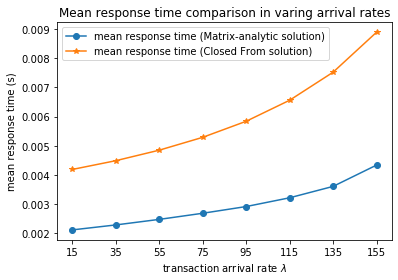

In [10]:
lambdas,mu1,mu2,k = np.arange(15,175,20),500,500,2
EN_matrix, ER_matrix, rho_matrix = [],[],[]
EN_closed, ER_closed, rho_closed = [],[],[]
for lam in lambdas:
    queue = PhQueue(lam,mu1,mu2)
    EN1,ER1 = queue.measurePerf()
    rho1 = queue.checkStability()
    EN_matrix.append(EN1)
    ER_matrix.append(ER1)
    rho_matrix.append(rho1)
    
    rho2, _, ER2, EN2, _ = mek1q_perf(k,lam,mu1)
    EN_closed.append(EN2)
    ER_closed.append(ER2)
    rho_closed.append(rho2)
    
#     print(lam,'EN:',EN, ' ER:', ER, ' rho:', rho)
fig,ax = plt.subplots(figsize=(6,4))
ax.plot(lambdas,ER_matrix, marker='o',label='mean response time (Matrix-analytic solution)')
ax.plot(lambdas,ER_closed, marker='*',label='mean response time (Closed From solution)')
ax.set_xticks(lambdas)
ax.set_xlabel("transaction arrival rate $\lambda$")
ax.set_ylabel("mean response time (s)")
ax.set_title("Mean response time comparison in varing arrival rates")
ax.legend()
fig.show()

<div align="left"><img src="img/hlf_perf.png"></div>